#**1.How did the COVID-19 pandemic impact ABC Company’s parcel business?**

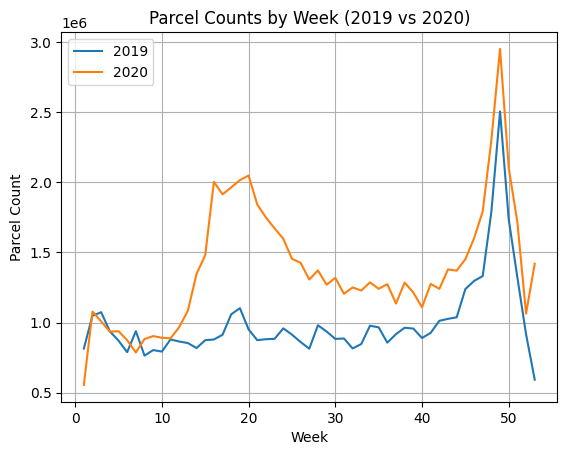

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the dataset
df = pd.read_csv('/content/COVID_Parcel_Business.csv')

enterprise_range = (500000, float('inf'))
largeRange = (200000, 500000)
mediumRange = (10000, 200000)
smallRange = (1000, 10000)

# Filter data for the years 2019 and 2020
df_2019 = df[df['THE_YEAR'] == 2019]
df_2020 = df[df['THE_YEAR'] == 2020]

# Group data by week and sum the parcel count
df_2019Weekly = df_2019.groupby('THE_WEEK')['VOLUME'].sum().reset_index()
df_2020Weekly = df_2020.groupby('THE_WEEK')['VOLUME'].sum().reset_index()

# Plot the line chart
plt.plot(df_2019Weekly['THE_WEEK'], df_2019Weekly['VOLUME'], label='2019')
plt.plot(df_2020Weekly['THE_WEEK'], df_2020Weekly['VOLUME'], label='2020')

# Add labels and title
plt.xlabel('Week')
plt.ylabel('Parcel Count')
plt.title('Parcel Counts by Week (2019 vs 2020)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

#**2.When were customer volumes first impacted by COVID-19?**

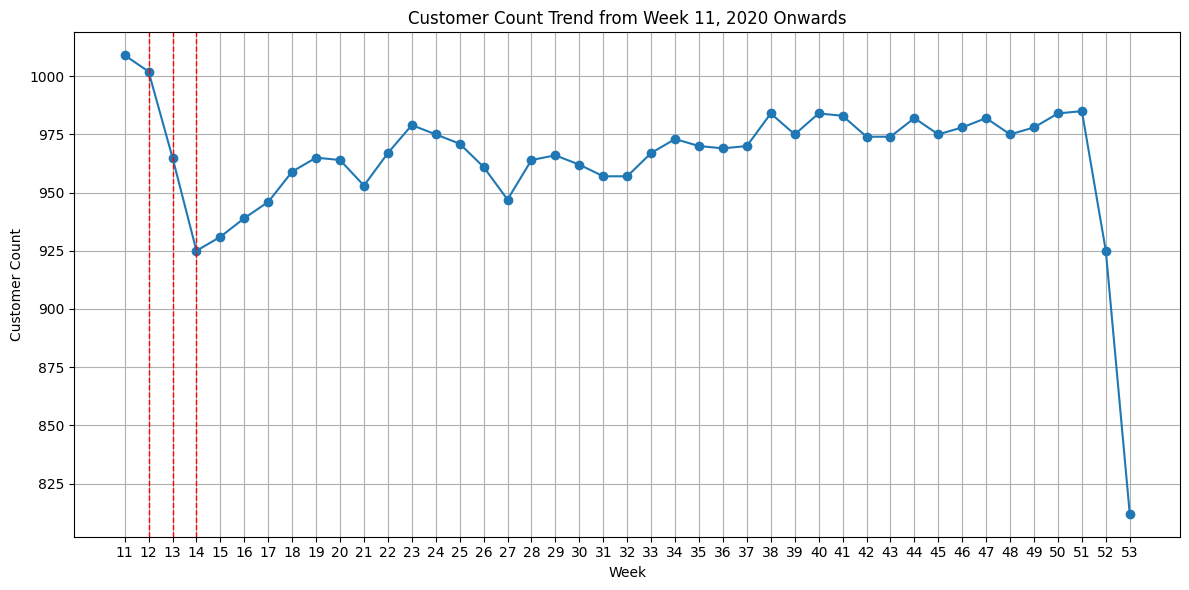

First 3 impacted weeks:
Week 12, Customer count: 1002
Week 13, Customer count: 965
Week 14, Customer count: 925
Trend: Decrease


In [3]:
# Filter data from Week 11, 2020 onwards
df_filtered = df[(df['THE_YEAR'] == 2020) & (df['THE_WEEK'] >= 11)]

# Calculate total customer count for each week from Week 11, 2020 onwards
weeklyCustomer_count = df_filtered.groupby('THE_WEEK')['FakeCustomerID'].nunique().reset_index()

# Identify the first 3 consecutive weeks where the customer count decreased or increased
consecutiveImpacted_weeks = weeklyCustomer_count[weeklyCustomer_count['FakeCustomerID'].diff().fillna(0) != 0].head(3)

# Determine the trend (increase or decrease) based on the first change
trends = 'Increase' if consecutiveImpacted_weeks.iloc[0]['FakeCustomerID'] > weeklyCustomer_count.iloc[0]['FakeCustomerID'] else 'Decrease'

# Plotting the line graph
plt.figure(figsize=(12, 6))
plt.plot(weeklyCustomer_count['THE_WEEK'], weeklyCustomer_count['FakeCustomerID'], marker='o', linestyle='-')
plt.title('Customer Count Trend from Week 11, 2020 Onwards')
plt.xlabel('Week')
plt.ylabel('Customer Count')
plt.grid(True)
plt.xticks(weeklyCustomer_count['THE_WEEK'])
plt.tight_layout()

# Highlighting the first 5 impacted weeks
for week in consecutiveImpacted_weeks['THE_WEEK']:
    plt.axvline(x=week, color='r', linestyle='--', linewidth=1)

plt.show()

print(f"First 3 impacted weeks:")
for index, row in consecutiveImpacted_weeks.iterrows():
    print(f"Week {int(row['THE_WEEK'])}, Customer count: {int(row['FakeCustomerID'])}")

print(f"Trend: {trends}")


#**3.What events within the COVID timeline may have contributed to the change?**

1.Lockdowns and Stay-at-Home Orders (March 2020)

2.Initial Panic Buying (March-April 2020)

3.Increased online purchase

4.Travel restrictions caused an increase in parcel volumes.

#**4.How did COVID-19 impact peak season in 2020?**

Total parcel shipments during the peak season in 2020: 16402470
Total parcel shipments during the peak season in 2019: 16605536


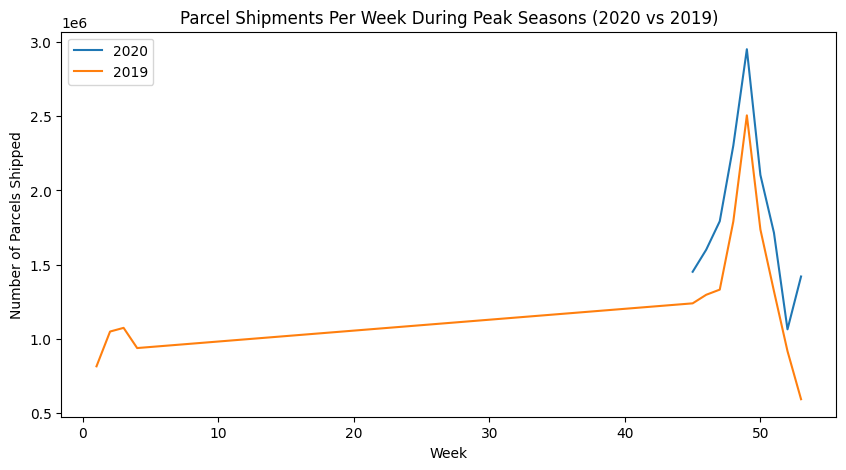

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the start and end dates for the peak season in 2020 and 2019
peak_season_start_2020 = '2020-11-02'
peak_season_end_2020 = '2020-12-31'

peak_season_start_2019 = '2019-11-04'
peak_season_end_2019 = '2020-01-20'

# Convert the peak season dates to datetime objects
peak_season_start_2020 = pd.to_datetime(peak_season_start_2020)
peak_season_end_2020 = pd.to_datetime(peak_season_end_2020)

peak_season_start_2019 = pd.to_datetime(peak_season_start_2019)
peak_season_end_2019 = pd.to_datetime(peak_season_end_2019)

# Filter the data for the peak season in 2020 and 2019
peak_season_2020 = df[(df['THE_YEAR'] == 2020) & ((df['THE_WEEK'] >= peak_season_start_2020.weekofyear) & (df['THE_WEEK'] <= peak_season_end_2020.weekofyear))]
peak_season_2019 = df[(df['THE_YEAR'] == 2019) & ((df['THE_WEEK'] >= peak_season_start_2019.weekofyear) | (df['THE_WEEK'] <= peak_season_end_2019.weekofyear))]

# Calculate the total parcel shipments during the peak season for both years
total_shipments_2020 = peak_season_2020['VOLUME'].sum()
total_shipments_2019 = peak_season_2019['VOLUME'].sum()

# Print the total parcel shipments during the peak season for both years
print("Total parcel shipments during the peak season in 2020:", total_shipments_2020)
print("Total parcel shipments during the peak season in 2019:", total_shipments_2019)

# Calculate the number of parcels shipped per week during the peak season for both years
parcels_per_week_2020 = peak_season_2020.groupby(peak_season_2020['THE_WEEK']).sum()['VOLUME']
parcels_per_week_2019 = peak_season_2019.groupby(peak_season_2019['THE_WEEK']).sum()['VOLUME']

# Plot the number of parcels shipped per week during the peak season for both years
plt.figure(figsize=(10, 5))
plt.plot(parcels_per_week_2020.index, parcels_per_week_2020.values, label='2020')
plt.plot(parcels_per_week_2019.index, parcels_per_week_2019.values, label='2019')
plt.title('Parcel Shipments Per Week During Peak Seasons (2020 vs 2019)')
plt.xlabel('Week')
plt.ylabel('Number of Parcels Shipped')
plt.legend()
plt.show()

#**5.How has COVID affected companies in the different customer groups (Enterprise, Large, etc.)?**

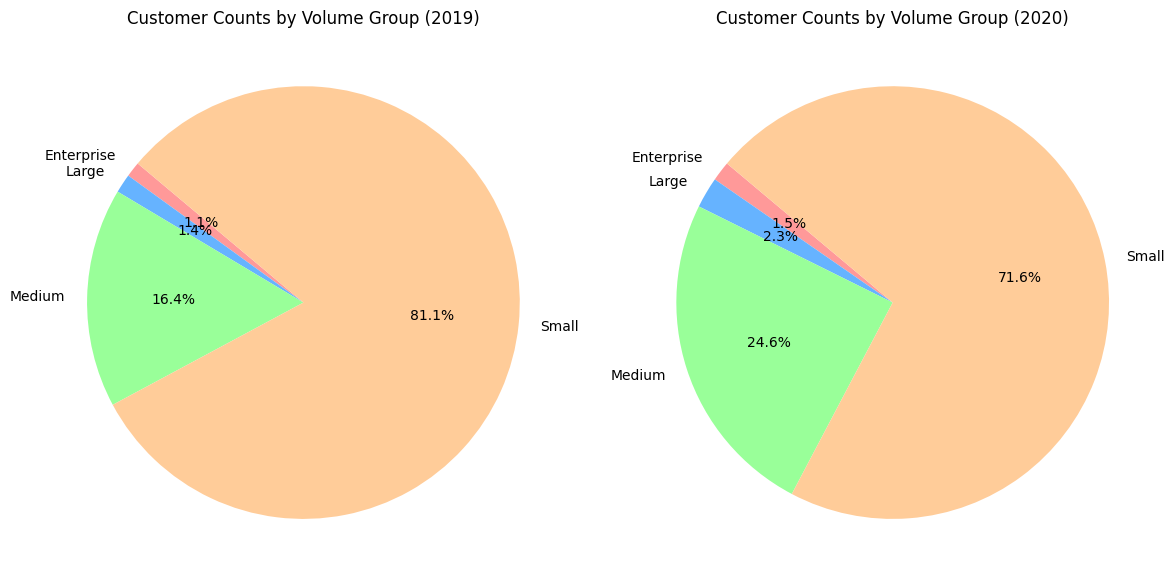

In [8]:
def calculate_customer_counts(df, year):

    # Filter the dataset for the specified year
    df_year = df[df['THE_YEAR'] == year]

    # Calculate the total parcel volumes for each customer
    customerVolumes = df_year.groupby('FakeCustomerID')['VOLUME'].sum()

    # Group the customers by their total parcel volumes
    enterprise_customers = customerVolumes[customerVolumes > enterprise_range[0]]
    largeCustomers = customerVolumes[(customerVolumes >= largeRange[0]) & (customerVolumes <= largeRange[1])]
    mediumCustomers = customerVolumes[(customerVolumes >= mediumRange[0]) & (customerVolumes <= mediumRange[1])]
    smallCustomers = customerVolumes[(customerVolumes >= smallRange[0]) & (customerVolumes <= smallRange[1])]

    # Count the number of customers in each volume group
    enterprise_count = len(enterprise_customers)
    large_count = len(largeCustomers)
    medium_count = len(mediumCustomers)
    small_count = len(smallCustomers)

    # Return the counts
    return enterprise_count, large_count, medium_count, small_count


# Calculate customer counts for each year
years = [2019, 2020]
counts = {year: calculate_customer_counts(df, year) for year in years}

# Plotting the chart
labels = ['Enterprise', 'Large', 'Medium', 'Small']
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

plt.figure(figsize=(12, 8))

for i, year in enumerate(years):
    plt.subplot(1, 2, i+1)
    plt.pie(counts[year], labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f'Customer Counts by Volume Group ({year})')

plt.tight_layout()
plt.show()



#**6.What percent of each customer group is growing, moderately growing, and declining during the COVID observation period?**

In [13]:
# Current period: week 1 to week 15, 2020 || Previous period: week 1 to week 15, 2019
currentPeriod = df[(df['THE_YEAR'] == 2020) & (df['THE_WEEK'] <= 15)]
previousPeriod = df[(df['THE_YEAR'] == 2019) & (df['THE_WEEK'] <= 15)]

# Calculate the total volume for each period
totalVolumeCurrent = currentPeriod['VOLUME'].sum()
totalVolumePrevious = previousPeriod['VOLUME'].sum()

# Calculate the ISGR
constantISGR = ((totalVolumeCurrent - totalVolumePrevious) / totalVolumePrevious) * 100

print("ISGR : {:.2f}%".format(constantISGR))
# Step 1: Volume in 2020 (week 13 to week 53)
def calculate_volume_2020(df):
    df_2020 = df[(df['THE_YEAR'] == 2020) & (df['THE_WEEK'] >= 13)]
    volume_2020 = df_2020.groupby('FakeCustomerID')['VOLUME'].sum()
    return volume_2020

# Step 2: Volume in 2019 for customers existing in 2020
def calculate_volume_2019(df, volume_2020):
    df_2019 = df[(df['THE_YEAR'] == 2019) & (df['THE_WEEK'] >= 13)]
    volume_2019 = df_2019.groupby('FakeCustomerID')['VOLUME'].sum()

    # Volume 2019 for customers existing in volume 2020
    volume_2019_filtered = volume_2019[volume_2019.index.isin(volume_2020.index)]
    return volume_2019_filtered

# Step 3: Calculate ISGR
def calculate_isgr(volume_2020, volume_2019):
    isgr = ((volume_2020 - volume_2019) / volume_2019) * 100
    return isgr

volume_2020 = calculate_volume_2020(df)
volume_2019_filtered = calculate_volume_2019(df, volume_2020)
isgr = calculate_isgr(volume_2020, volume_2019_filtered)

declining_threshold = 0
stable_threshold = 50

# ISGR
def classify_customers(isgr_series):
    if isgr_series < declining_threshold:
        return 'Declining Customers'
    elif declining_threshold <= isgr_series <= stable_threshold:
        return 'Stable Customers'
    else:
        return 'High Growth Customers'

# Calculate ISGR for each customer
isgr = calculate_isgr(volume_2020, volume_2019_filtered)

# Apply function
customer_classification = isgr.apply(classify_customers)

# Count the number of customers in each group
customer_counts = customer_classification.value_counts()

# Print the counts of customers in each group
print("Customer Classification:")
print(customer_counts)

ISGR : 11.40%
Customer Classification:
VOLUME
High Growth Customers    393
Declining Customers      367
Stable Customers         274
Name: count, dtype: int64


#**7.What percent of each customer group are new customers during the COVID observation period?**

Customers in each group in pre-covid:
Enterprise Customers: 13
Large Customers: 18
Medium Customers: 203
Small Customers: 827

Customers in each group during covid:
Enterprise Customers: 12
Large Customers: 22
Medium Customers: 198
Small Customers: 654

Percentage of New Enterprise Customers : 8.0
Percentage of New Large Customers : 41.0
Percentage of New Medium Customers : 31.0
Percentage of New Small Customers : 8.0


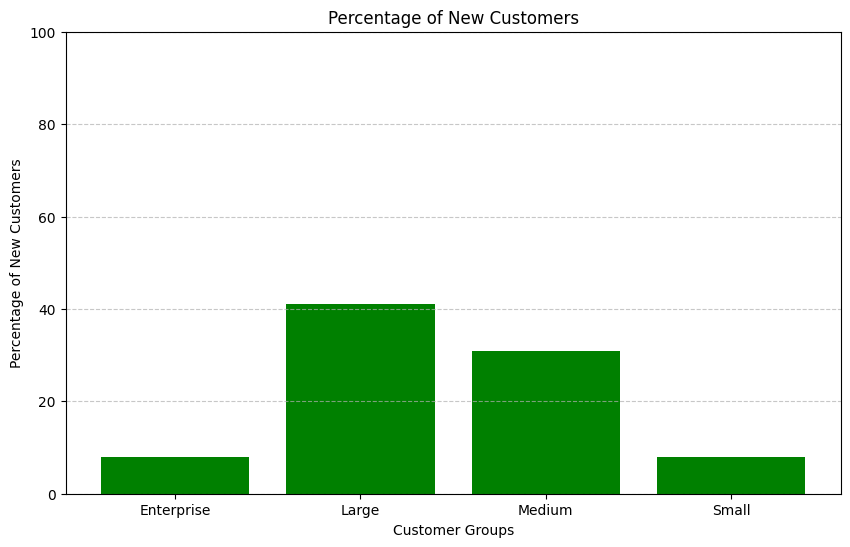

In [35]:
from datetime import datetime

def calculate_customer_counts(df, start_year, start_week, end_year, end_week):


    # Convert start and end year/week into dates
    start_date = datetime.strptime(f'{start_year}-W{start_week}-1', "%Y-W%W-%w").date()
    end_date = datetime.strptime(f'{end_year}-W{end_week}-0', "%Y-W%W-%w").date()

    # Filter the dataset for the specified date range
    df_range = df[(df['THE_YEAR'] >= start_year) & (df['THE_YEAR'] <= end_year) &
                  ((df['THE_YEAR'] > start_year) | (df['THE_WEEK'] >= start_week)) &
                  ((df['THE_YEAR'] < end_year) | (df['THE_WEEK'] <= end_week))]

    # Calculate the total parcel volumes for each customer
    customer_volumes = df_range.groupby('FakeCustomerID')['VOLUME'].sum()

    # Group the customers by their total parcel volumes
    enterprise_customers = customer_volumes[customer_volumes > enterprise_range[0]]
    large_customers = customer_volumes[(customer_volumes >= largeRange[0]) & (customer_volumes <= largeRange[1])]
    medium_customers = customer_volumes[(customer_volumes >= mediumRange[0]) & (customer_volumes <= mediumRange[1])]
    small_customers = customer_volumes[(customer_volumes >= smallRange[0]) & (customer_volumes <= smallRange[1])]

    # Count the number of customers in each volume group
    enterprise_count = len(enterprise_customers)
    large_count = len(large_customers)
    medium_count = len(medium_customers)
    small_count = len(small_customers)

    # Get the customer IDs for each volume group
    enterprise_ids = enterprise_customers.index.tolist()
    large_ids = large_customers.index.tolist()
    medium_ids = medium_customers.index.tolist()
    small_ids = small_customers.index.tolist()

    # Return the counts and customer IDs for each group
    return enterprise_count, large_count, medium_count, small_count, enterprise_ids, large_ids, medium_ids, small_ids


def find_new_customers(customer_ids_1, customer_ids_2):
    # Convert both lists of customer IDs to sets for set operations
    customer_ids_1_set = set(customer_ids_1)
    customer_ids_2_set = set(customer_ids_2)

    # Find the customer IDs that exist in customer_ids_2_set but not in customer_ids_1_set
    new_customers = customer_ids_2_set - customer_ids_1_set

    # Convert the result back to a list if needed
    new_customers_list = list(new_customers)

    return new_customers_list


# Example usage: Calculate customer counts for a specific year and week range
start_year_1 = 2019
start_week_1 = 1
end_year_1 = 2020
end_week_1 = 11

start_year_2 = 2020
start_week_2 = 12
end_year_2 = 2020
end_week_2 = 53

counts_1 = calculate_customer_counts(df, start_year_1, start_week_1, end_year_1, end_week_1)
counts_2 = calculate_customer_counts(df, start_year_2, start_week_2, end_year_2, end_week_2)

# Print the counts for each group
print("Customers in each group in pre-covid:")
print("Enterprise Customers:", counts_1[0])
print("Large Customers:", counts_1[1])
print("Medium Customers:", counts_1[2])
print("Small Customers:", counts_1[3])

print("\nCustomers in each group during covid:")
print("Enterprise Customers:", counts_2[0])
print("Large Customers:", counts_2[1])
print("Medium Customers:", counts_2[2])
print("Small Customers:", counts_2[3])

# Find new customers for each group between the two periods
new_enterprise_customers = find_new_customers(counts_1[4], counts_2[4])
new_large_customers = find_new_customers(counts_1[5], counts_2[5])
new_medium_customers = find_new_customers(counts_1[6], counts_2[6])
new_small_customers = find_new_customers(counts_1[7], counts_2[7])


# Calculate the percentage of new customers in each group
total_enterprise_customers = counts_2[0]
total_large_customers = counts_2[1]
total_medium_customers = counts_2[2]
total_small_customers = counts_2[3]

percent_new_enterprise_customers = round((len(new_enterprise_customers) / total_enterprise_customers) * 100,0)
percent_new_large_customers = round((len(new_large_customers) / total_large_customers) * 100,0)
percent_new_medium_customers = round((len(new_medium_customers) / total_medium_customers) * 100,0)
percent_new_small_customers = round((len(new_small_customers) / total_small_customers) * 100,0)

# Print the percentages of new customers for each group
print("\nPercentage of New Enterprise Customers :", percent_new_enterprise_customers)
print("Percentage of New Large Customers :", percent_new_large_customers)
print("Percentage of New Medium Customers :", percent_new_medium_customers)
print("Percentage of New Small Customers :", percent_new_small_customers)



# Define the customer groups
customer_groups = ['Enterprise', 'Large', 'Medium', 'Small']

# Define the percentages of new customers for each group
percentages_new_customers = [
    percent_new_enterprise_customers,
    percent_new_large_customers,
    percent_new_medium_customers,
    percent_new_small_customers
]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(customer_groups, percentages_new_customers, color='green')
plt.title('Percentage of New Customers')
plt.xlabel('Customer Groups')
plt.ylabel('Percentage of New Customers')
plt.ylim(0, 100)  # Set y-axis limit to ensure percentages are displayed properly
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#**8.What percent of 2019 customers in each group did we lose during the COVID observation period?**


Percentage of Lost Enterprise Customers : 15.0
Percentage of Lost Large Customers : 28.0
Percentage of Lost Medium Customers : 33.0
Percentage of Lost Small Customers : 28.0


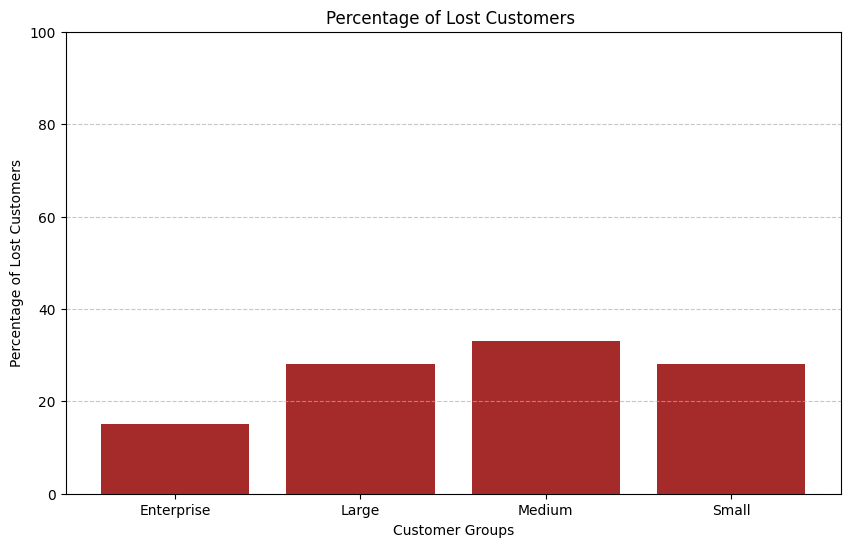

In [34]:
def find_lost_customers(customer_ids_1, customer_ids_2):
    # Convert both lists of customer IDs to sets for set operations
    customer_ids_1_set = set(customer_ids_1)
    customer_ids_2_set = set(customer_ids_2)

    # Find the customer IDs that exist in customer_ids_1_set but not in customer_ids_2_set
    lost_customers = customer_ids_1_set - customer_ids_2_set

    # Convert the result back to a list if needed
    lost_customers_list = list(lost_customers)

    return lost_customers_list


    # Find lost customers for each group between the two periods
lost_enterprise_customers = find_lost_customers(counts_1[4], counts_2[4])
lost_large_customers = find_lost_customers(counts_1[5], counts_2[5])
lost_medium_customers = find_lost_customers(counts_1[6], counts_2[6])
lost_small_customers = find_lost_customers(counts_1[7], counts_2[7])



# Calculate the percentage of lost customers in each group
total_enterprise_customers = counts_1[0]
total_large_customers = counts_1[1]
total_medium_customers = counts_1[2]
total_small_customers = counts_1[3]

percent_lost_enterprise_customers = round((len(lost_enterprise_customers) / total_enterprise_customers) * 100,0)
percent_lost_large_customers = round((len(lost_large_customers) / total_large_customers) * 100,0)
percent_lost_medium_customers = round((len(lost_medium_customers) / total_medium_customers) * 100,0)
percent_lost_small_customers = round((len(lost_small_customers) / total_small_customers) * 100,0)

# Print the percentages of lost customers for each group
print("\nPercentage of Lost Enterprise Customers :", percent_lost_enterprise_customers)
print("Percentage of Lost Large Customers :", percent_lost_large_customers)
print("Percentage of Lost Medium Customers :", percent_lost_medium_customers)
print("Percentage of Lost Small Customers :", percent_lost_small_customers)


# Define the customer groups
customer_groups = ['Enterprise', 'Large', 'Medium', 'Small']

# Define the percentages of lost customers for each group
percentages_lost_customers = [
    percent_lost_enterprise_customers,
    percent_lost_large_customers,
    percent_lost_medium_customers,
    percent_lost_small_customers
]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(customer_groups, percentages_lost_customers, color='brown')
plt.title('Percentage of Lost Customers ')
plt.xlabel('Customer Groups')
plt.ylabel('Percentage of Lost Customers')
plt.ylim(0, 100)  # Set y-axis limit to ensure percentages are displayed properly
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#**9.What was the overall impact of COVID on volumes and revenue by customer group?**

2019:
Enterprise Customers: 13
Total Volume for Enterprise Customers: 46268433
Revenue for Enterprise Customers: 46268433
Large Customers: 18
Total Volume for Large Customers: 5365926
Revenue for Large Customers: 5365926
Medium Customers: 203
Total Volume for Medium Customers: 8052884
Revenue for Medium Customers: 8052884
Small Customers: 827
Total Volume for Small Customers: 2875674
Revenue for Small Customers: 2875674

Second Range:
Enterprise Customers: 12
Total Volume for Enterprise Customers: 47372905
Revenue for Enterprise Customers: 47372905
Large Customers: 22
Total Volume for Large Customers: 6841805
Revenue for Large Customers: 6841805
Medium Customers: 198
Total Volume for Medium Customers: 7015085
Revenue for Medium Customers: 7015085
Small Customers: 654
Total Volume for Small Customers: 2422296
Revenue for Small Customers: 2422296


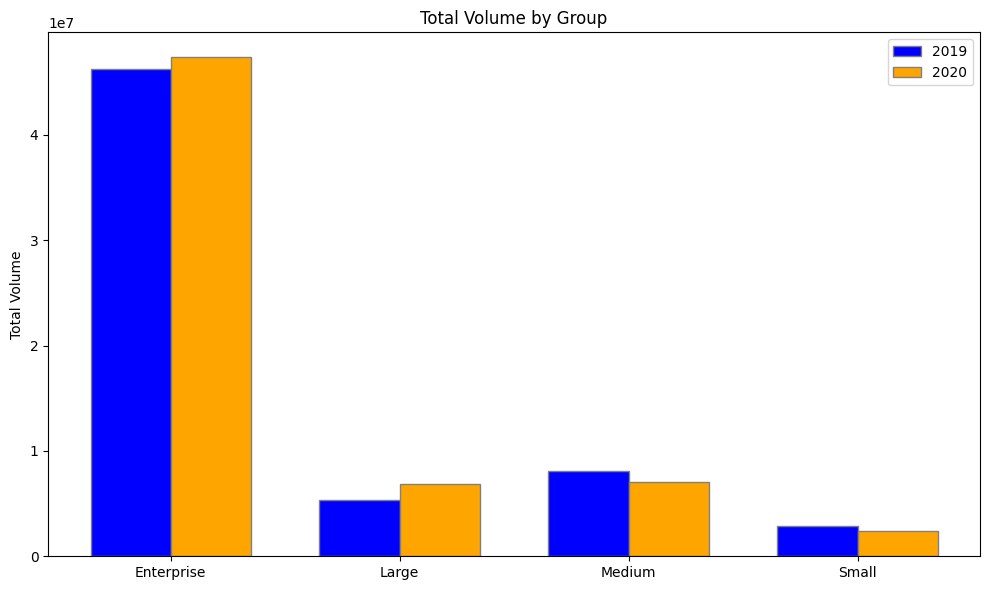

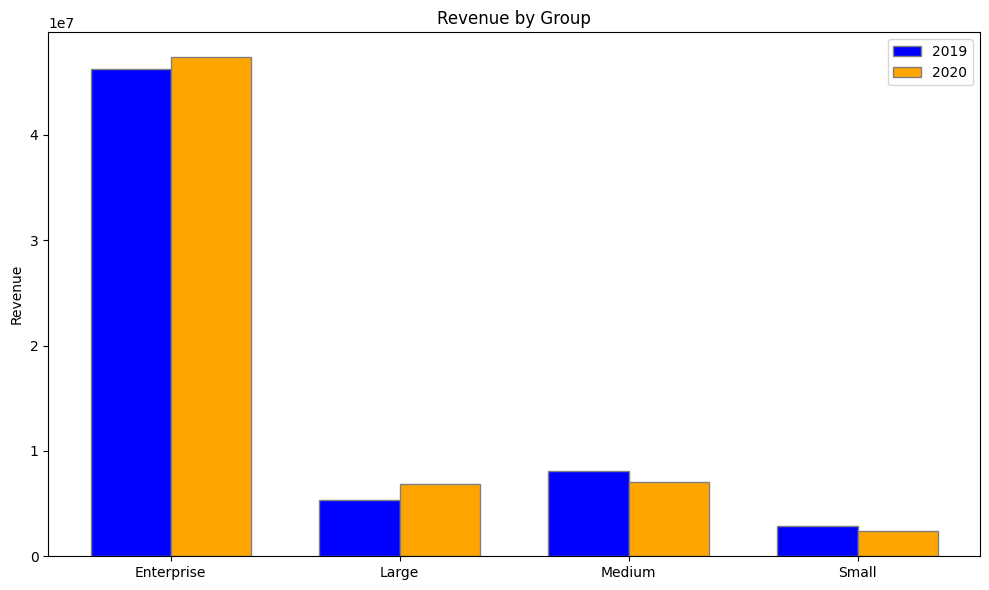

In [22]:
def calculate_customer_counts(df, start_year_1, start_week_1, end_year_1, end_week_1, start_year_2, start_week_2, end_year_2, end_week_2):


    # Dataset specified date ranges
    df_range_1 = df[(df['THE_YEAR'] >= start_year_1) & (df['THE_YEAR'] <= end_year_1) &
                    ((df['THE_YEAR'] > start_year_1) | (df['THE_WEEK'] >= start_week_1)) &
                    ((df['THE_YEAR'] < end_year_1) | (df['THE_WEEK'] <= end_week_1))]

    df_range_2 = df[(df['THE_YEAR'] >= start_year_2) & (df['THE_YEAR'] <= end_year_2) &
                    ((df['THE_YEAR'] > start_year_2) | (df['THE_WEEK'] >= start_week_2)) &
                    ((df['THE_YEAR'] < end_year_2) | (df['THE_WEEK'] <= end_week_2))]

    # Calculate the total parcel volumes
    customer_volumes_1 = df_range_1.groupby('FakeCustomerID')['VOLUME'].sum()
    customer_volumes_2 = df_range_2.groupby('FakeCustomerID')['VOLUME'].sum()

    # Group the customers
    enterprise_customers_1 = customer_volumes_1[customer_volumes_1 > enterprise_range[0]]
    large_customers_1 = customer_volumes_1[(customer_volumes_1 >= largeRange[0]) & (customer_volumes_1 <= largeRange[1])]
    medium_customers_1 = customer_volumes_1[(customer_volumes_1 >= mediumRange[0]) & (customer_volumes_1 <= mediumRange[1])]
    small_customers_1 = customer_volumes_1[(customer_volumes_1 >= smallRange[0]) & (customer_volumes_1 <= smallRange[1])]

    enterprise_customers_2 = customer_volumes_2[customer_volumes_2 > enterprise_range[0]]
    large_customers_2 = customer_volumes_2[(customer_volumes_2 >= largeRange[0]) & (customer_volumes_2 <= largeRange[1])]
    medium_customers_2 = customer_volumes_2[(customer_volumes_2 >= mediumRange[0]) & (customer_volumes_2 <= mediumRange[1])]
    small_customers_2 = customer_volumes_2[(customer_volumes_2 >= smallRange[0]) & (customer_volumes_2 <= smallRange[1])]

    # Count the number of customers in each volume group for both ranges
    enterprise_count_1 = len(enterprise_customers_1)
    largeCount_1 = len(large_customers_1)
    mediumCount_1 = len(medium_customers_1)
    smallCount_1 = len(small_customers_1)

    enterprise_count_2 = len(enterprise_customers_2)
    largeCount_2 = len(large_customers_2)
    mediumCount_2 = len(medium_customers_2)
    smallCount_2 = len(small_customers_2)

    # Calculate total volume by customer group for both ranges
    total_volume_enterprise_1 = enterprise_customers_1.sum()
    totalVolume_large_1 = large_customers_1.sum()
    totalVolume_medium_1 = medium_customers_1.sum()
    totalVolume_small_1 = small_customers_1.sum()

    total_volume_enterprise_2 = enterprise_customers_2.sum()
    totalVolume_large_2 = large_customers_2.sum()
    totalVolume_medium_2 = medium_customers_2.sum()
    totalVolume_small_2 = small_customers_2.sum()

    # Calculate revenue for each customer group
    revenue_enterprise_1 = total_volume_enterprise_1
    revenue_large_1 = totalVolume_large_1
    revenue_medium_1 = totalVolume_medium_1
    revenue_small_1 = totalVolume_small_1

    revenue_enterprise_2 = total_volume_enterprise_2
    revenue_large_2 = totalVolume_large_2
    revenue_medium_2 = totalVolume_medium_2
    revenue_small_2 = totalVolume_small_2


    return (
        (enterprise_count_1, enterprise_customers_1.index.tolist(), total_volume_enterprise_1, revenue_enterprise_1),
        (largeCount_1, large_customers_1.index.tolist(), totalVolume_large_1, revenue_large_1),
        (mediumCount_1, medium_customers_1.index.tolist(), totalVolume_medium_1, revenue_medium_1),
        (smallCount_1, small_customers_1.index.tolist(), totalVolume_small_1, revenue_small_1),
        (enterprise_count_2, enterprise_customers_2.index.tolist(), total_volume_enterprise_2, revenue_enterprise_2),
        (largeCount_2, large_customers_2.index.tolist(), totalVolume_large_2, revenue_large_2),
        (mediumCount_2, medium_customers_2.index.tolist(), totalVolume_medium_2, revenue_medium_2),
        (smallCount_2, small_customers_2.index.tolist(), totalVolume_small_2, revenue_small_2)
    )

# Calculate customer counts, total volume, and revenue by customer groups for two specific year and week ranges
start_year_1 = 2019
start_week_1 = 1
end_year_1 = 2020
end_week_1 = 11

start_year_2 = 2020
start_week_2 = 12
end_year_2 = 2020
end_week_2 = 53

counts_and_revenue = calculate_customer_counts(df, start_year_1, start_week_1, end_year_1, end_week_1, start_year_2, start_week_2, end_year_2, end_week_2)

# Accessing the results for the first range
print("2019:")
print("Enterprise Customers:", counts_and_revenue[0][0])
print("Total Volume for Enterprise Customers:", counts_and_revenue[0][2])
print("Revenue for Enterprise Customers:", counts_and_revenue[0][3])

print("Large Customers:", counts_and_revenue[1][0])
print("Total Volume for Large Customers:", counts_and_revenue[1][2])
print("Revenue for Large Customers:", counts_and_revenue[1][3])

print("Medium Customers:", counts_and_revenue[2][0])
print("Total Volume for Medium Customers:", counts_and_revenue[2][2])
print("Revenue for Medium Customers:", counts_and_revenue[2][3])

print("Small Customers:", counts_and_revenue[3][0])
print("Total Volume for Small Customers:", counts_and_revenue[3][2])
print("Revenue for Small Customers:", counts_and_revenue[3][3])

# Accessing the results for the second range
print("\nSecond Range:")
print("Enterprise Customers:", counts_and_revenue[4][0])
print("Total Volume for Enterprise Customers:", counts_and_revenue[4][2])
print("Revenue for Enterprise Customers:", counts_and_revenue[4][3])

print("Large Customers:", counts_and_revenue[5][0])
print("Total Volume for Large Customers:", counts_and_revenue[5][2])
print("Revenue for Large Customers:", counts_and_revenue[5][3])

print("Medium Customers:", counts_and_revenue[6][0])
print("Total Volume for Medium Customers:", counts_and_revenue[6][2])
print("Revenue for Medium Customers:", counts_and_revenue[6][3])

print("Small Customers:", counts_and_revenue[7][0])
print("Total Volume for Small Customers:", counts_and_revenue[7][2])
print("Revenue for Small Customers:", counts_and_revenue[7][3])


def plot_volume_and_revenue(counts_and_revenue):
    # Customer group names
    groups = ['Enterprise', 'Large', 'Medium', 'Small']

    # Extract total volume and revenue for both date ranges
    totalVolume_1 = [count_and_revenue[2] for count_and_revenue in counts_and_revenue[:4]]
    totalVolume_2 = [count_and_revenue[2] for count_and_revenue in counts_and_revenue[4:]]
    revenue_1 = [count_and_revenue[3] for count_and_revenue in counts_and_revenue[:4]]
    revenue_2 = [count_and_revenue[3] for count_and_revenue in counts_and_revenue[4:]]

    # Set position of bar on X axis
    bar_width = 0.35
    r1 = np.arange(len(groups))
    r2 = [x + bar_width for x in r1]

    # Plotting
    fig, axs = plt.subplots(figsize=(10, 6))

    # Total volume
    axs.bar(r1, totalVolume_1, color='blue', width=bar_width, edgecolor='grey', label='2019')
    axs.bar(r2, totalVolume_2, color='orange', width=bar_width, edgecolor='grey', label='2020')
    axs.set_xticks([r + bar_width/2 for r in range(len(groups))])
    axs.set_xticklabels(groups)
    axs.set_ylabel('Total Volume')
    axs.set_title('Total Volume by Group')
    axs.legend()


    plt.tight_layout()
    plt.show()

    # Plotting
    fig, axs = plt.subplots(figsize=(10, 6))

    # Revenue
    axs.bar(r1, revenue_1, color='blue', width=bar_width, edgecolor='grey', label='2019')
    axs.bar(r2, revenue_2, color='orange', width=bar_width, edgecolor='grey', label='2020')
    axs.set_xticks([r + bar_width/2 for r in range(len(groups))])
    axs.set_xticklabels(groups)
    axs.set_ylabel('Revenue')
    axs.set_title('Revenue by Group')
    axs.legend()


    plt.tight_layout()
    plt.show()

# Pass the counts and revenue data
plot_volume_and_revenue(counts_and_revenue)
